In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


In [2]:
# Load the data
data = pd.read_csv('Unemployment in India.csv')

# Remove leading spaces in column names
data.columns = data.columns.str.strip()

# Strip leading and trailing spaces from 'Date' column
data['Date'] = data['Date'].str.strip()

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set 'Date' column as the index of the dataframe
data.set_index('Date', inplace=True)

# Sort the dataframe by the index
data.sort_index(inplace=True)

# Reset index before plotting
data.reset_index(inplace=True)
data.head()


,Date,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,2019-05-31,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural
1,2019-05-31,Telangana,Monthly,2.23,11053353.0,61.74,Rural
2,2019-05-31,Tamil Nadu,Monthly,0.97,15844698.0,49.44,Rural
3,2019-05-31,Rajasthan,Monthly,4.03,15226005.0,38.52,Rural
4,2019-05-31,Punjab,Monthly,9.17,6088547.0,44.79,Rural


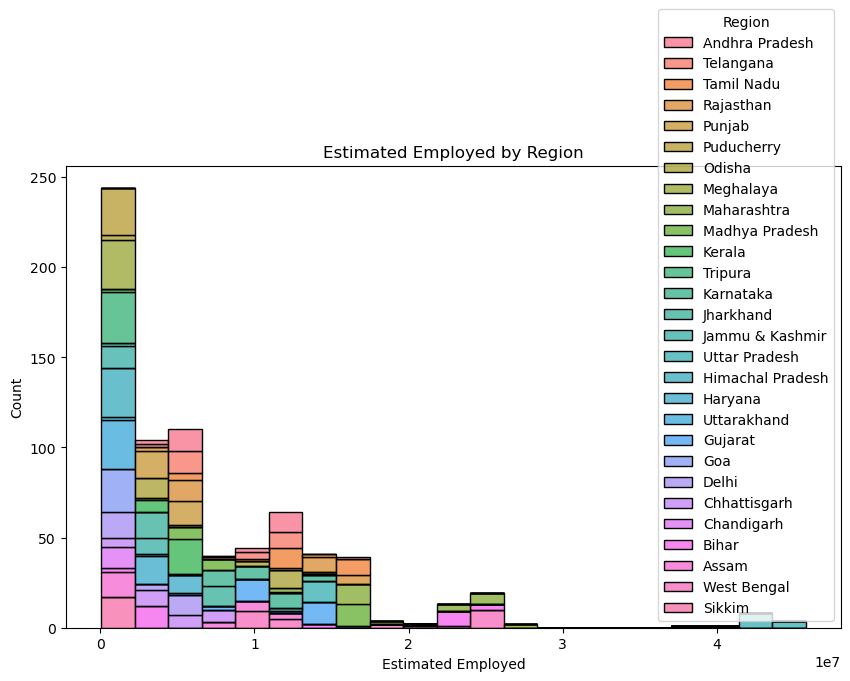

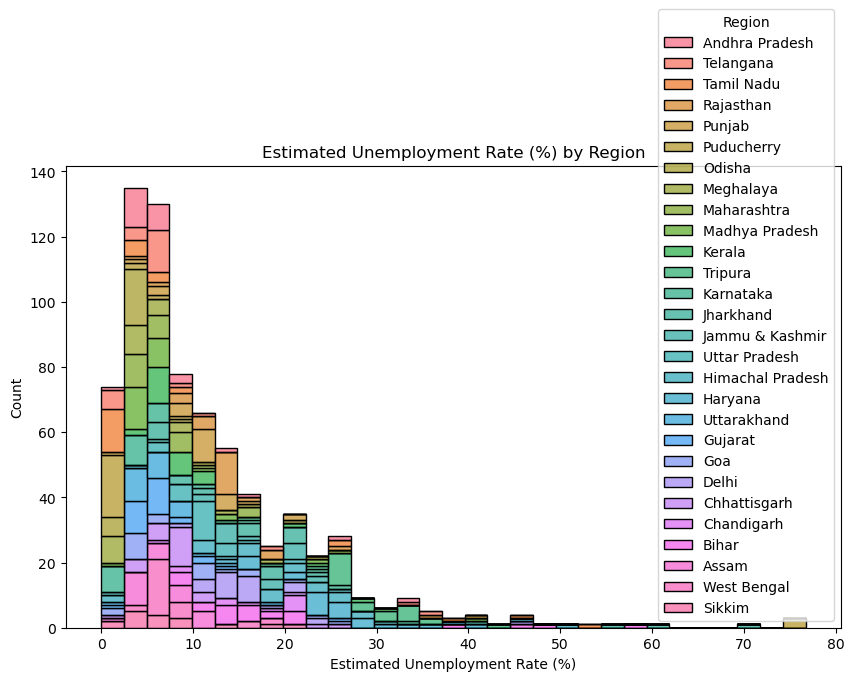

In [3]:
# Histograms for Employment and Unemployment Rates by Region
for column in ['Estimated Employed', 'Estimated Unemployment Rate (%)']:
    plt.figure(figsize=(10,6))
    sns.histplot(data=data, x=column, hue='Region', multiple="stack")
    plt.title(f'{column} by Region')
    plt.show()


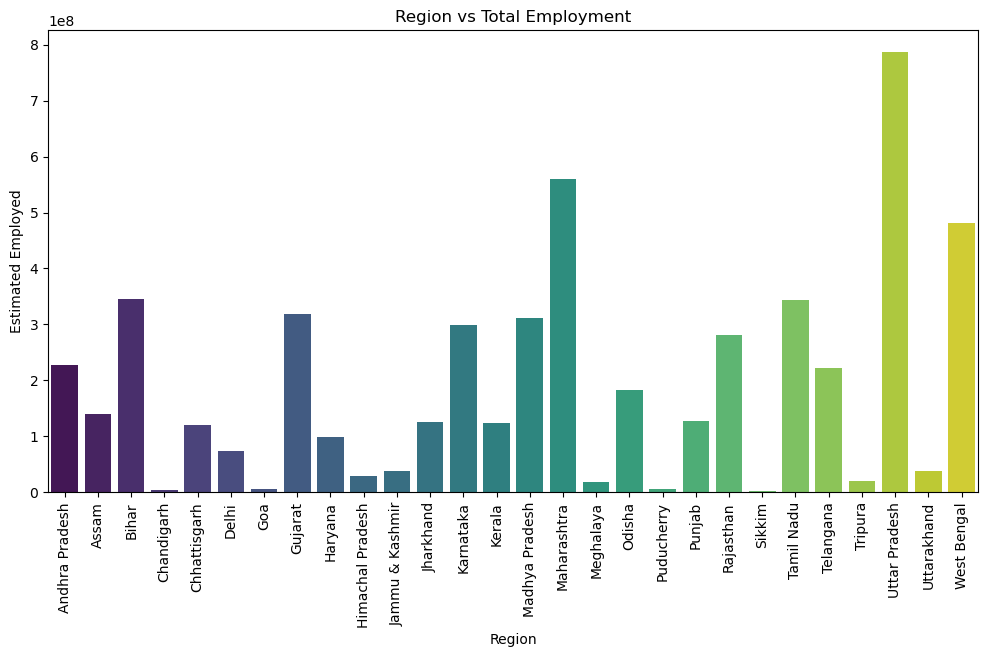

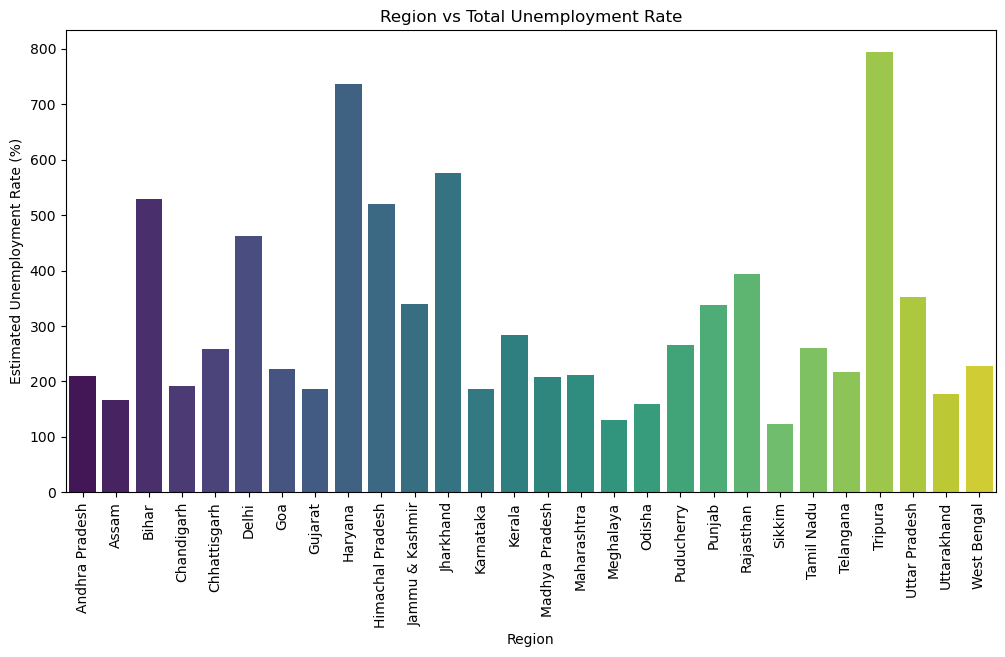

In [4]:
# Bar plots for Total Employment and Unemployment Rates by State and Region
for column, ylabel in zip(['Estimated Employed', 'Estimated Unemployment Rate (%)'], ['Total Employment', 'Total Unemployment Rate']):
    grouped_data = data.groupby('Region')[column].sum().reset_index()
    plt.figure(figsize=(12,6))
    sns.barplot(x='Region', y=column, data=grouped_data, palette='viridis')
    plt.title(f'Region vs {ylabel}')
    plt.xticks(rotation=90)
    plt.show()


In [5]:
# Aggregate data before creating sunburst chart
agg_data = data.groupby(['Region', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Sunburst chart for Unemployment Rate by State and Region
fig = px.sunburst(agg_data, path=['Region', 'Area'], values='Estimated Unemployment Rate (%)',
                  color='Estimated Unemployment Rate (%)', 
                  color_continuous_scale='RdYlGn',
                  title='Unemployment Rate by Area and Region')
fig.show()
